# Beta-VAE: Understanding the Trade-off Between Reconstruction and Disentanglement

## What is a Variational Autoencoder (VAE)?

A **Variational Autoencoder** is a powerful generative model that learns to compress data into a lower-dimensional representation (called the *latent space*) and then reconstruct it back to the original form. Think of it like learning a secret code for images—the encoder creates the code, and the decoder translates it back.

### The Magic of VAEs: Two Key Components

1. **Encoder**: Compresses input images into a compact latent representation
2. **Decoder**: Reconstructs images from the latent representation

But VAEs are special because they don't just learn any compression—they learn a *probabilistic* one that forces the latent space to have nice properties for generating new data.

## The VAE Loss Function: A Balancing Act

A standard VAE optimizes two competing objectives:

```
Total Loss = Reconstruction Loss + KL Divergence Loss
```

- **Reconstruction Loss**: "How well can I recreate the original image?"
- **KL Divergence Loss**: "How close is my latent space to a standard normal distribution?"

The second term is crucial—it ensures that:
- The latent space is smooth and continuous
- We can generate new images by sampling random points
- Similar images are mapped to nearby points in latent space

## Enter Beta-VAE: Taking Control of the Trade-off

**Beta-VAE** gives us a powerful knob to control this balance:

```
Total Loss = Reconstruction Loss + β × KL Divergence Loss
```

The parameter **β** (beta) acts like a volume control for how much we care about having a well-structured latent space.

### What Different β Values Mean:

#### β = 1 (Standard VAE)
- **Focus**: Balanced between reconstruction and structure
- **Result**: Good reconstructions, reasonably organized latent space
- **Analogy**: Like learning to draw—you care equally about accuracy and having a systematic approach

#### β < 1 (Reconstruction-Heavy)
- **Focus**: Prioritizes perfect reconstructions
- **Result**: Very accurate reconstructions but messier latent space
- **Analogy**: Like a photocopy machine—perfect copies but no understanding of organization

#### β > 1 (Disentanglement-Heavy)
- **Focus**: Forces highly structured, interpretable latent space
- **Result**: More blurry reconstructions but beautiful, disentangled representations
- **Analogy**: Like learning the "grammar" of images—less perfect copies but better understanding of underlying structure

## Why Does This Matter? The Power of Disentanglement

When β > 1, Beta-VAE encourages **disentanglement**—where each dimension of the latent space controls a specific, interpretable feature of the data. For Fashion-MNIST, this might mean:

- Dimension 1 controls the type of clothing (shoe vs. shirt)
- Dimension 2 controls the orientation or style
- Each dimension has a clear, separate meaning

This is incredibly powerful for:
- **Interpretability**: Understanding what the model learned
- **Controlled Generation**: Creating images with specific properties
- **Data Exploration**: Discovering hidden patterns in your dataset

## The Experiment: Seeing β in Action

In our experiment, we'll train three models with different β values and observe:

### 1. **Reconstruction Quality**
- Lower β → Sharper, more accurate reconstructions
- Higher β → Potentially blurrier but more "semantically meaningful" reconstructions

### 2. **Latent Space Structure**
- Lower β → More scattered, less organized latent space
- Higher β → Smoother, more structured latent space with meaningful transitions

### 3. **Generation Quality**
- Lower β → Good individual samples but inconsistent
- Higher β → More consistent and controllable generation

## Visual Intuition: The 2D Latent Space

By using a 2-dimensional latent space, we can visualize the entire "universe" of learned representations as a 2D grid. Each point in this grid corresponds to a generated image, showing us:

- **Smoothness**: How gradually images change as we move through latent space
- **Organization**: Whether similar items cluster together
- **Coverage**: How well the model uses the available latent space

Think of it as a map where each coordinate generates a different Fashion-MNIST item!

## Key Takeaways for Students

1. **Machine Learning is About Trade-offs**: There's rarely a "perfect" solution—Beta-VAE shows us how to navigate the trade-off between accuracy and interpretability.

2. **Hyperparameters Have Meaning**: β isn't just a number to tune—it represents a fundamental choice about what we want our model to prioritize.

3. **Visualization is Powerful**: The 2D latent space visualization makes abstract concepts concrete and interpretable.

4. **Structure Matters**: Sometimes accepting slightly worse reconstruction quality gives us much more interpretable and useful representations.

## What to Watch For in the Results

As you run the experiments, pay attention to:

- **β = 1**: Baseline performance—good balance
- **β = 4**: Often the "sweet spot"—noticeably more structured without sacrificing too much reconstruction quality
- **β = 10**: Maximum structure—see how the latent space becomes beautifully organized, even if individual reconstructions are slightly blurrier

The magic happens in the latent space visualizations—watch how higher β values create smoother, more meaningful transitions between different types of clothing items!

---


Beta-VAE Training on Fashion-MNIST
Testing model dimensions...
Input shape: torch.Size([4, 1, 28, 28])
Encoded mu shape: torch.Size([4, 2])
Encoded log_var shape: torch.Size([4, 2])
Latent z shape: torch.Size([4, 2])
Decoded shape: torch.Size([4, 1, 28, 28])
Reconstruction shape: torch.Size([4, 1, 28, 28])
✅ Model dimensions are correct!

Dimensions look good! Starting training...
Using device: cuda

Training Beta-VAE with beta = 1
Train Epoch: 1 [0/60000 (0%)]	Loss: 558.7973
Train Epoch: 1 [25600/60000 (43%)]	Loss: 262.4485
Train Epoch: 1 [51200/60000 (85%)]	Loss: 272.1679
====> Epoch: 1 Average loss: 275.4596, Recon Loss: 275.3733, KLD Loss: 40.4791
Train Epoch: 2 [0/60000 (0%)]	Loss: 270.6230
Train Epoch: 2 [25600/60000 (43%)]	Loss: 255.1740
Train Epoch: 2 [51200/60000 (85%)]	Loss: 271.7473
====> Epoch: 2 Average loss: 258.4098, Recon Loss: 258.3213, KLD Loss: 41.5149
Train Epoch: 3 [0/60000 (0%)]	Loss: 254.9233
Train Epoch: 3 [25600/60000 (43%)]	Loss: 268.4730
Train Epoch: 3 [51200

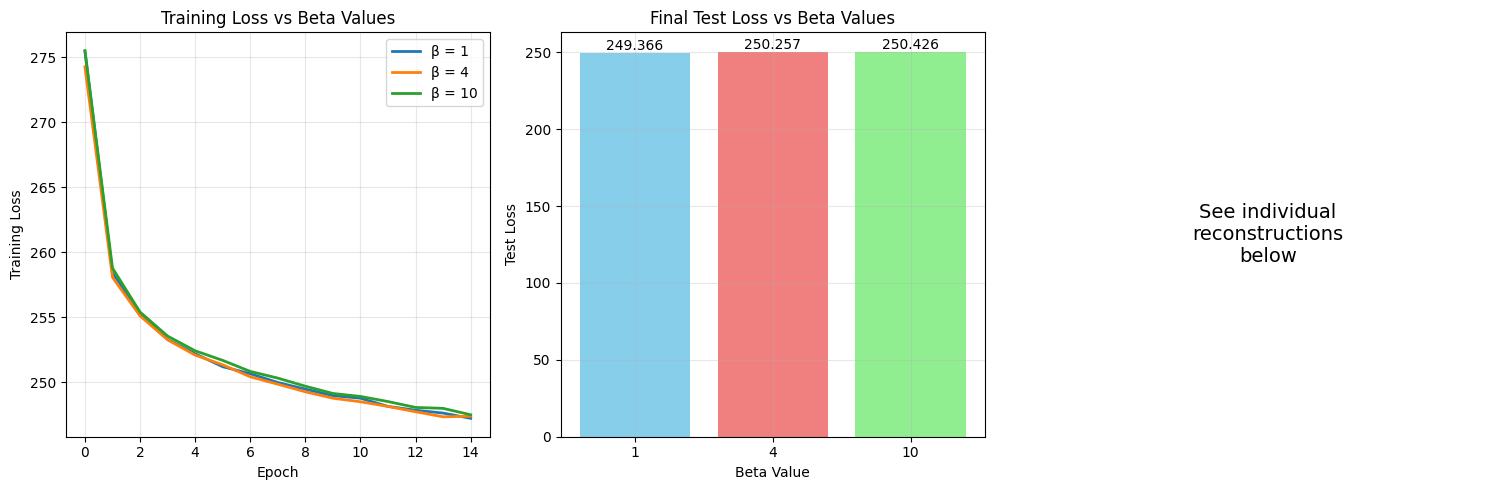


Comparing Reconstructions for Different Beta Values:

Beta = 1 - Reconstructions:


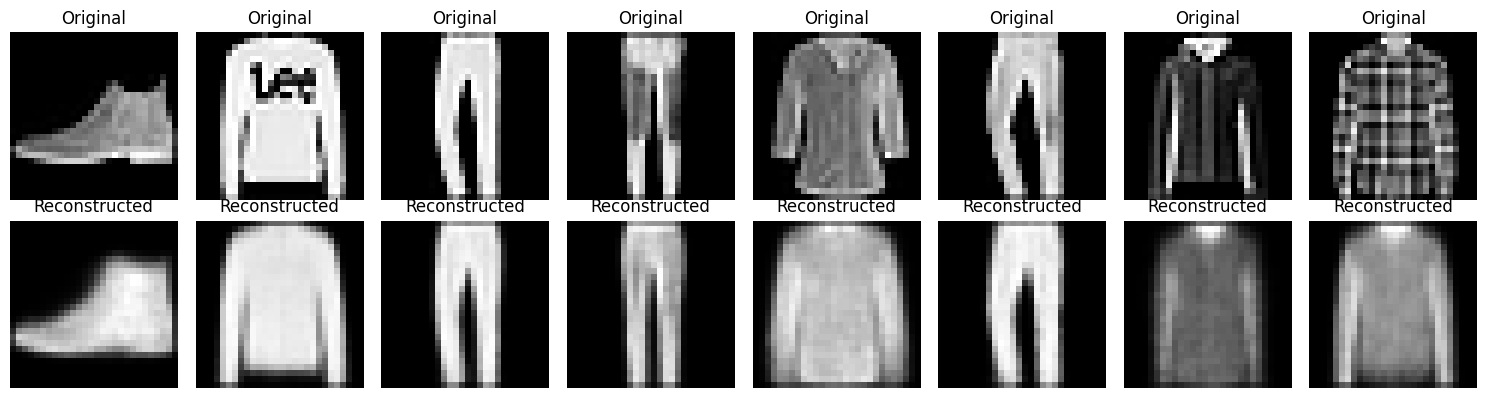


Beta = 4 - Reconstructions:


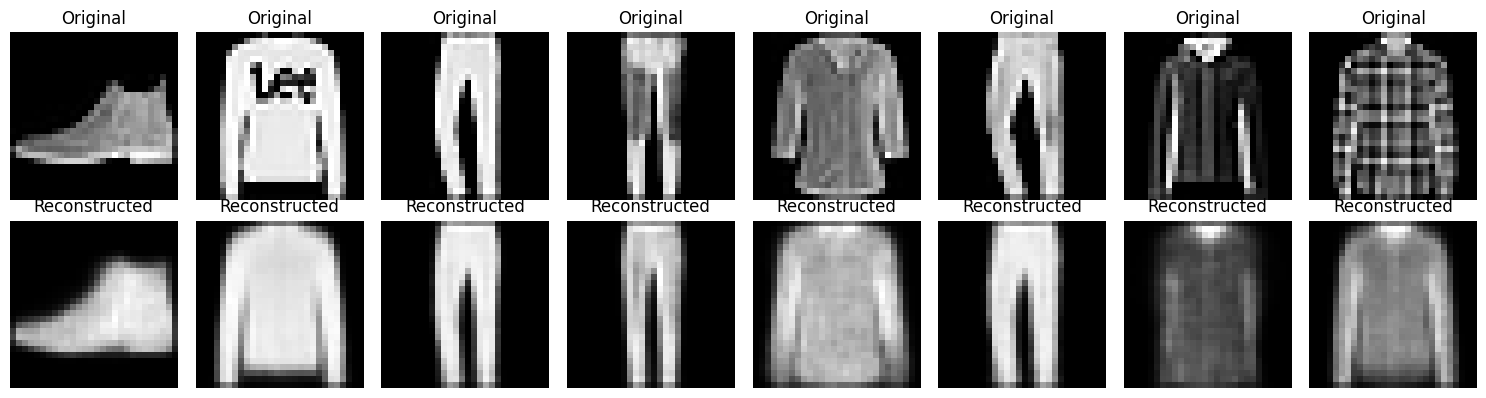


Beta = 10 - Reconstructions:


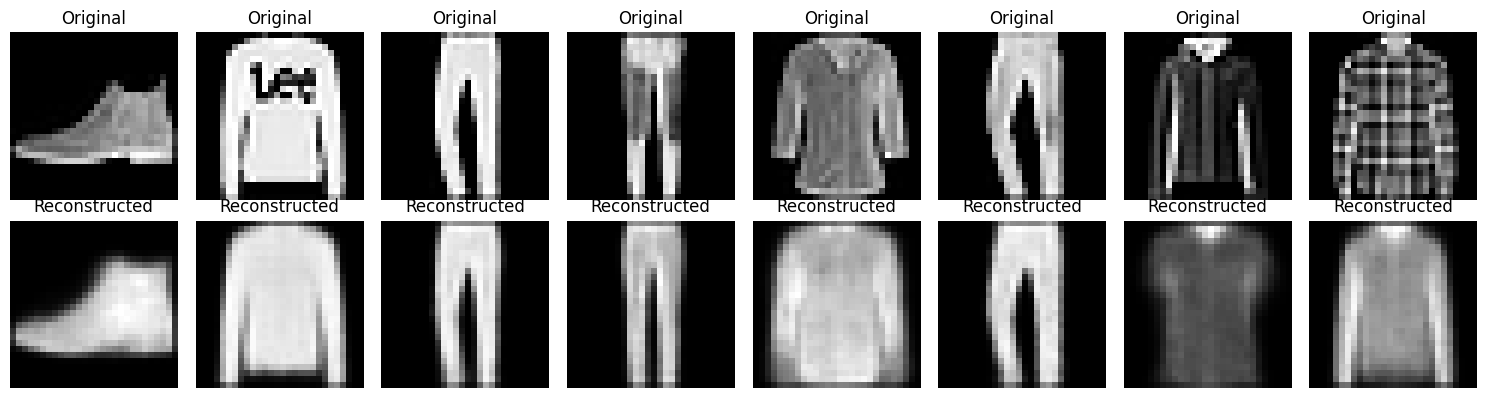


Comparing Latent Space Visualizations:

Latent space visualization for Beta = 1:


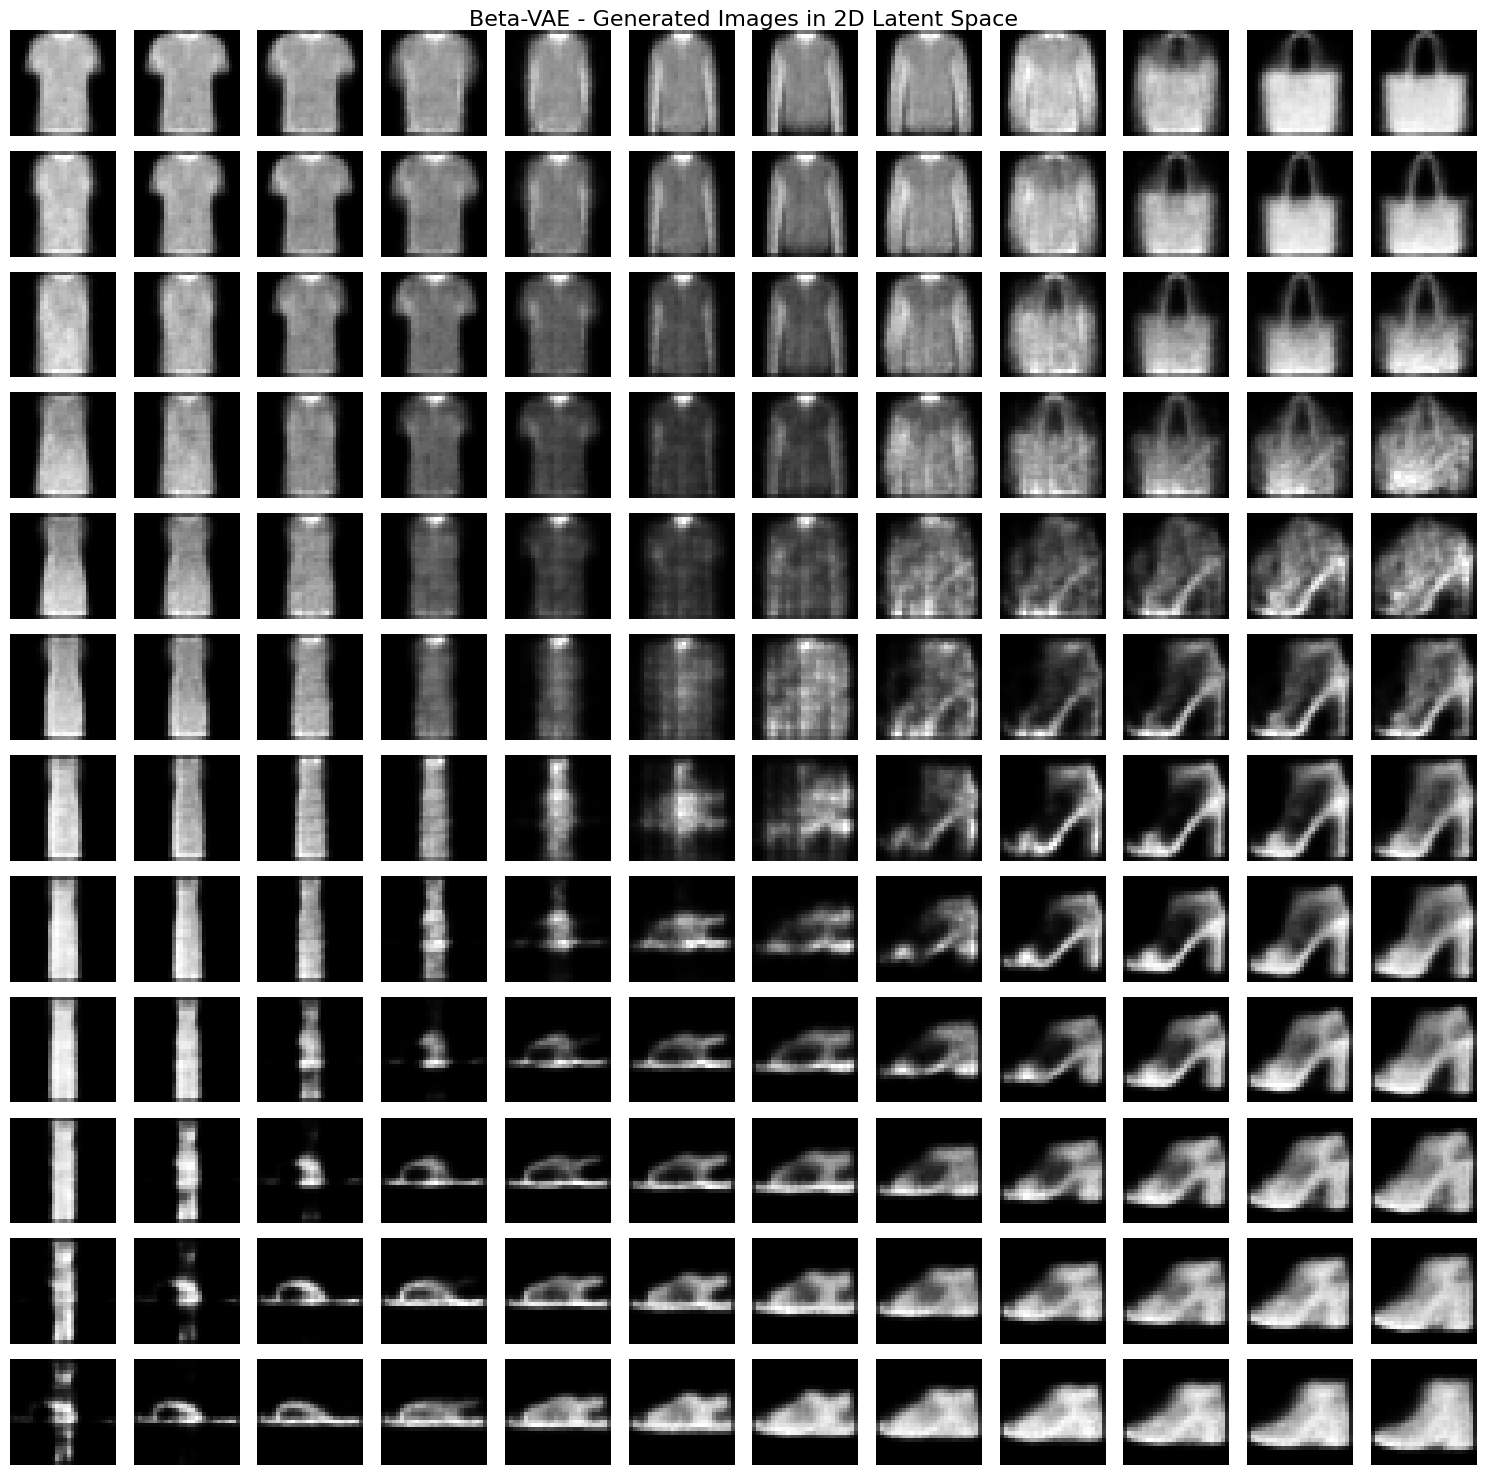


Latent space visualization for Beta = 4:


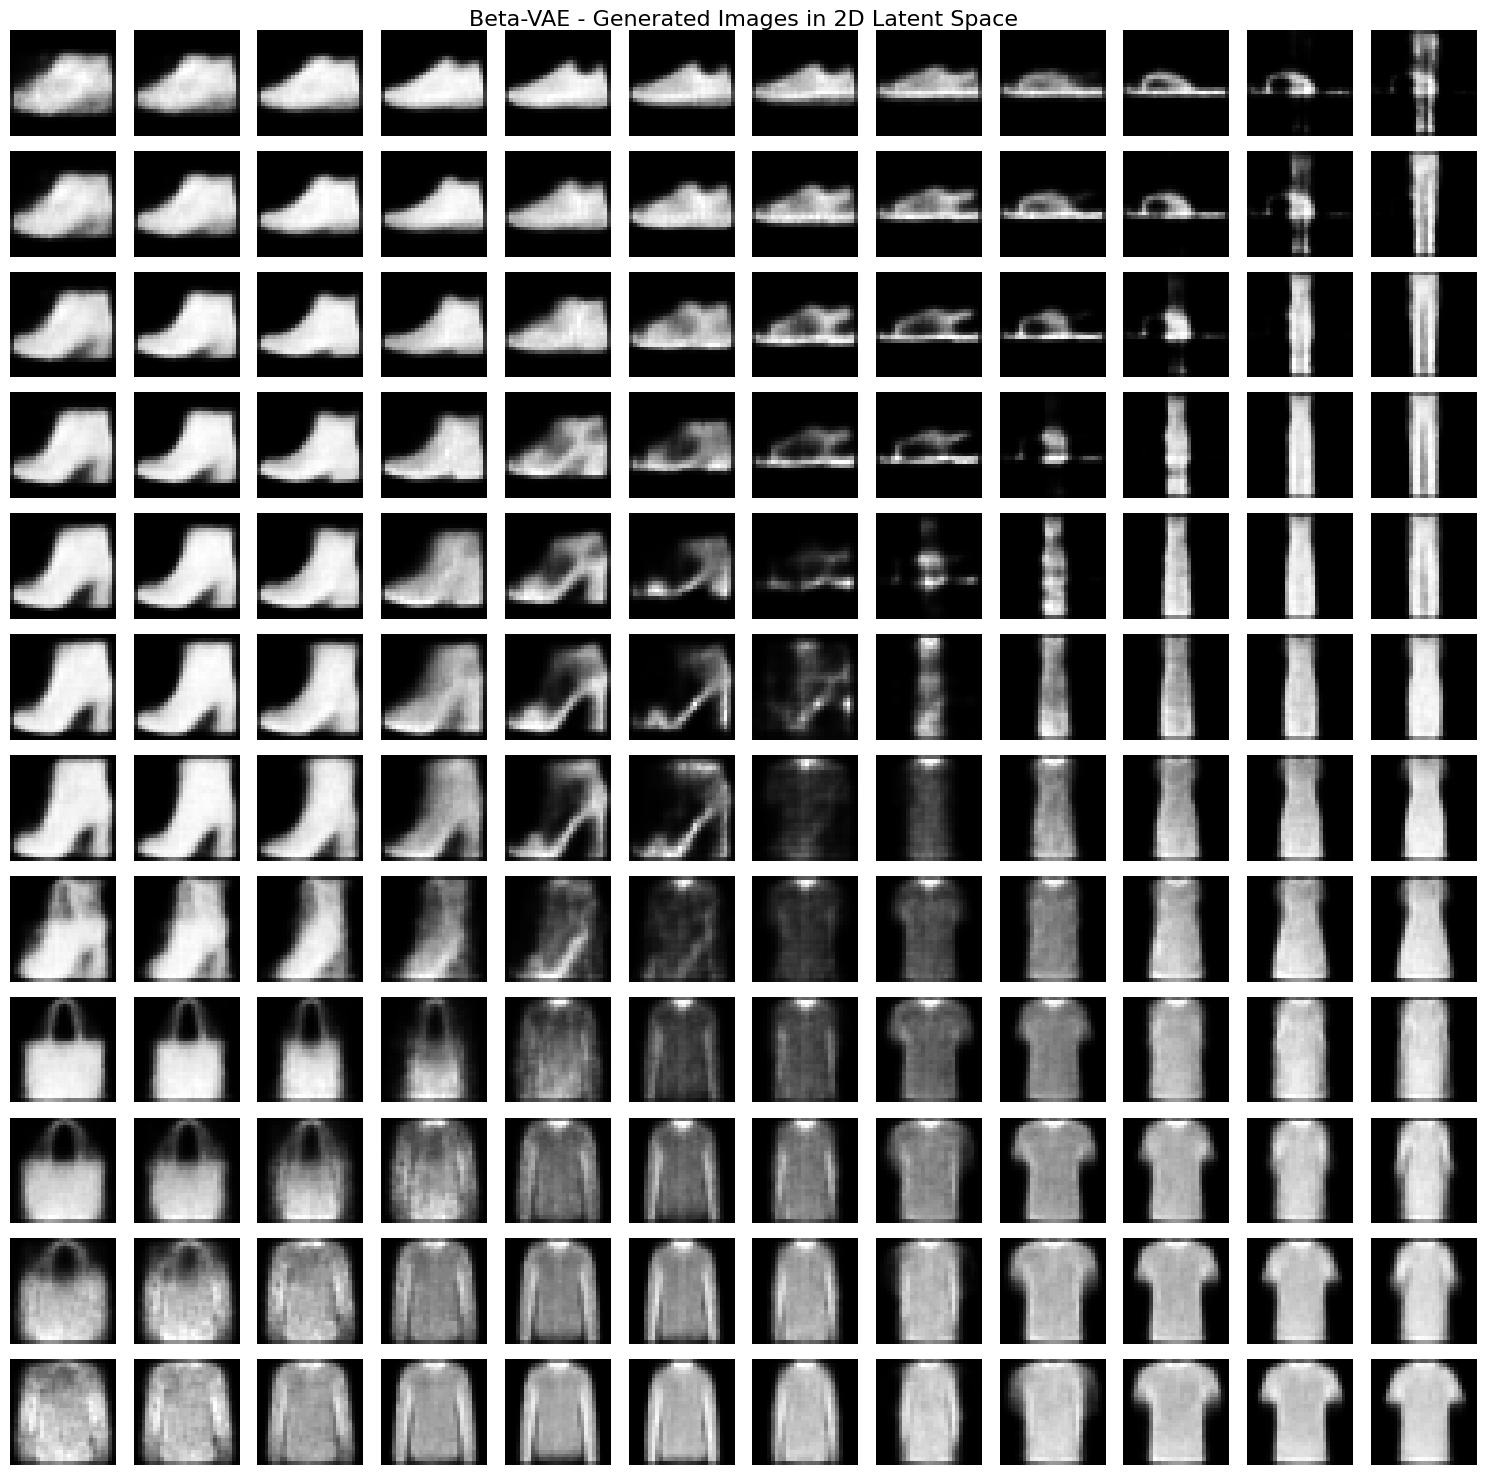


Latent space visualization for Beta = 10:


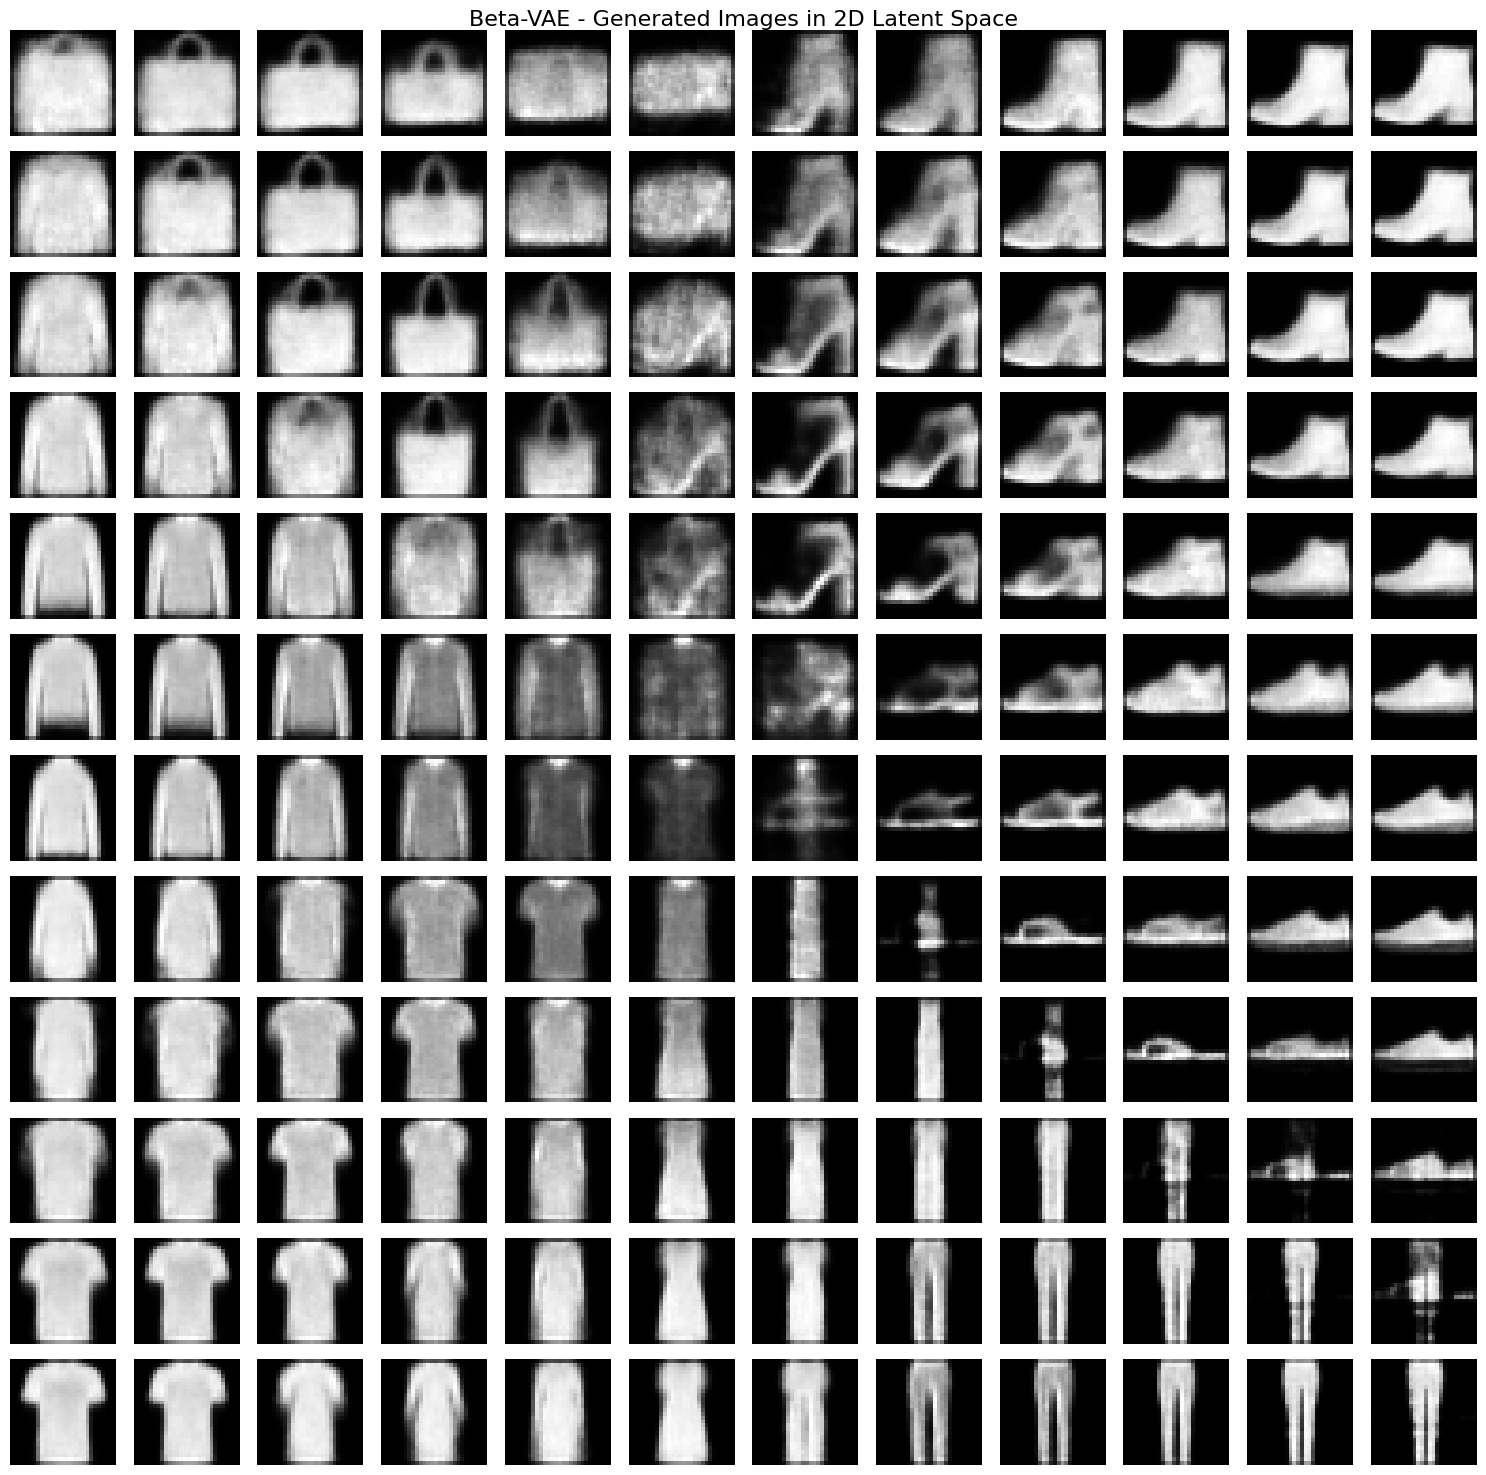


UNDERSTANDING BETA VALUES

    Beta (β) in Beta-VAE controls the trade-off between reconstruction quality and disentanglement:
    
    • β = 1: Standard VAE - focuses on reconstruction quality
    • β > 1: Higher emphasis on regularization (KL divergence)
             - Better disentanglement but potentially worse reconstruction
             - Forces the latent space to be more structured
    
    Key observations:
    • Lower β: Better reconstructions, less structured latent space
    • Higher β: More disentangled representations, potentially blurrier reconstructions
    • β = 4 is often a good balance for many applications
    
    The latent space visualizations show how β affects the smoothness and structure
    of the learned representations in the 2D latent space.
    
    Architecture improvements made:
    • Used Binary Cross-Entropy loss instead of MSE for better image quality
    • Improved encoder/decoder architecture with proper kernel sizes
    • Added weight decay for b

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from abc import ABC, abstractmethod

# Base VAE class (simplified version)
class BaseVAE(nn.Module, ABC):
    def __init__(self) -> None:
        super(BaseVAE, self).__init__()

    def encode(self, input):
        raise NotImplementedError

    def decode(self, input):
        raise NotImplementedError

    def sample(self, batch_size: int, current_device, **kwargs):
        raise NotImplementedError

    def generate(self, x, **kwargs):
        raise NotImplementedError

    @abstractmethod
    def forward(self, *inputs):
        pass

    @abstractmethod
    def loss_function(self, *inputs, **kwargs):
        pass


class BetaVAE(BaseVAE):
    num_iter = 0  # Global static variable to keep track of iterations

    def __init__(self,
                 in_channels: int,
                 latent_dim: int,
                 hidden_dims: List = None,
                 beta: int = 4,
                 gamma: float = 1000.,
                 max_capacity: int = 25,
                 Capacity_max_iter: int = 1e5,
                 loss_type: str = 'B',
                 **kwargs) -> None:
        super(BetaVAE, self).__init__()

        self.latent_dim = latent_dim
        self.beta = beta
        self.gamma = gamma
        self.loss_type = loss_type
        self.C_max = torch.Tensor([max_capacity])
        self.C_stop_iter = Capacity_max_iter

        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 256]

        # Build Encoder - More aggressive downsampling for cleaner latent space
        encoder_modules = []

        # First conv block: 28x28 -> 14x14
        encoder_modules.append(
            nn.Sequential(
                nn.Conv2d(in_channels, 32, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(32),
                nn.ReLU(inplace=True)
            )
        )

        # Second conv block: 14x14 -> 7x7
        encoder_modules.append(
            nn.Sequential(
                nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(64),
                nn.ReLU(inplace=True)
            )
        )

        # Third conv block: 7x7 -> 4x4 (using padding=2 to handle odd dimension)
        encoder_modules.append(
            nn.Sequential(
                nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=2),
                nn.BatchNorm2d(128),
                nn.ReLU(inplace=True)
            )
        )

        # Fourth conv block: 4x4 -> 2x2
        encoder_modules.append(
            nn.Sequential(
                nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(256),
                nn.ReLU(inplace=True)
            )
        )

        self.encoder = nn.Sequential(*encoder_modules)

        # Latent space projections
        self.fc_mu = nn.Linear(256 * 2 * 2, latent_dim)
        self.fc_var = nn.Linear(256 * 2 * 2, latent_dim)

        # Build Decoder
        self.decoder_input = nn.Linear(latent_dim, 256 * 2 * 2)

        decoder_modules = []

        # First deconv: 2x2 -> 4x4
        decoder_modules.append(
            nn.Sequential(
                nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(128),
                nn.ReLU(inplace=True)
            )
        )

        # Second deconv: 4x4 -> 7x7 (needs careful handling)
        decoder_modules.append(
            nn.Sequential(
                nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=2, output_padding=1),
                nn.BatchNorm2d(64),
                nn.ReLU(inplace=True)
            )
        )

        # Third deconv: 7x7 -> 14x14
        decoder_modules.append(
            nn.Sequential(
                nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
                nn.BatchNorm2d(32),
                nn.ReLU(inplace=True)
            )
        )

        self.decoder = nn.Sequential(*decoder_modules)

        # Final layer: 14x14 -> 28x28
        self.final_layer = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def encode(self, input):
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes.
        """
        result = self.encoder(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        mu = self.fc_mu(result)
        log_var = self.fc_var(result)

        return [mu, log_var]

    def decode(self, z):
        result = self.decoder_input(z)
        result = result.view(-1, 256, 2, 2)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def reparameterize(self, mu, logvar):
        """
        Reparameterization trick to sample from N(mu, var) from N(0,1).
        """
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, input, **kwargs):
        mu, log_var = self.encode(input)
        z = self.reparameterize(mu, log_var)
        return [self.decode(z), input, mu, log_var]

    def loss_function(self, *args, **kwargs):
        self.num_iter += 1
        recons = args[0]
        input = args[1]
        mu = args[2]
        log_var = args[3]
        kld_weight = kwargs['M_N']  # Account for the minibatch samples from the dataset

        # Use binary cross entropy for better Fashion-MNIST results
        recons_loss = F.binary_cross_entropy(recons, input, reduction='sum') / input.size(0)
        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1), dim=0)

        if self.loss_type == 'H':  # https://openreview.net/forum?id=Sy2fzU9gl
            loss = recons_loss + self.beta * kld_weight * kld_loss
        elif self.loss_type == 'B':  # https://arxiv.org/pdf/1804.03599.pdf
            self.C_max = self.C_max.to(input.device)
            C = torch.clamp(self.C_max / self.C_stop_iter * self.num_iter, 0, self.C_max.data[0])
            loss = recons_loss + self.gamma * kld_weight * (kld_loss - C).abs()
        else:
            raise ValueError('Undefined loss type.')

        return {'loss': loss, 'Reconstruction_Loss': recons_loss, 'KLD': kld_loss}

    def sample(self, num_samples: int, current_device, **kwargs):
        """
        Samples from the latent space and return the corresponding image space map.
        """
        z = torch.randn(num_samples, self.latent_dim)
        z = z.to(current_device)
        samples = self.decode(z)
        return samples

    def generate(self, x, **kwargs):
        """
        Given an input image x, returns the reconstructed image
        """
        return self.forward(x)[0]


def load_fashion_mnist(batch_size=128):
    """Load Fashion-MNIST dataset with proper preprocessing"""
    transform = transforms.Compose([
        transforms.ToTensor(),
        # No additional normalization needed - keep in [0,1] range for BCE loss
    ])

    train_dataset = torchvision.datasets.FashionMNIST(
        root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.FashionMNIST(
        root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, test_loader


def train_beta_vae(model, train_loader, optimizer, device, epoch):
    """Train the Beta-VAE for one epoch"""
    model.train()
    train_loss = 0
    train_recon_loss = 0
    train_kld_loss = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        # Forward pass
        results = model(data)

        # Calculate loss with proper dataset weighting
        loss_dict = model.loss_function(*results, M_N=len(data)/len(train_loader.dataset))
        loss = loss_dict['loss']

        # Backward pass
        loss.backward()
        optimizer.step()

        # Accumulate losses
        train_loss += loss.item()
        train_recon_loss += loss_dict['Reconstruction_Loss'].item()
        train_kld_loss += loss_dict['KLD'].item()

        if batch_idx % 200 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\t'
                  f'Loss: {loss.item():.4f}')

    avg_loss = train_loss / len(train_loader)
    avg_recon_loss = train_recon_loss / len(train_loader)
    avg_kld_loss = train_kld_loss / len(train_loader)

    print(f'====> Epoch: {epoch} Average loss: {avg_loss:.4f}, '
          f'Recon Loss: {avg_recon_loss:.4f}, KLD Loss: {avg_kld_loss:.4f}')

    return avg_loss, avg_recon_loss, avg_kld_loss


def test_beta_vae(model, test_loader, device):
    """Test the Beta-VAE"""
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            results = model(data)
            loss_dict = model.loss_function(*results, M_N=len(data)/len(test_loader.dataset))
            test_loss += loss_dict['loss'].item()

    test_loss /= len(test_loader)
    print(f'====> Test set loss: {test_loss:.4f}')
    return test_loss


def visualize_reconstructions(model, test_loader, device, num_images=8):
    """Visualize original vs reconstructed images"""
    model.eval()

    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data[:num_images].to(device)
        reconstructions = model.generate(data)

        # Move to CPU and convert to numpy
        data = data.cpu().numpy()
        reconstructions = reconstructions.cpu().numpy()

        fig, axes = plt.subplots(2, num_images, figsize=(15, 4))

        for i in range(num_images):
            # Original images
            axes[0, i].imshow(data[i].squeeze(), cmap='gray')
            axes[0, i].set_title('Original')
            axes[0, i].axis('off')

            # Reconstructed images
            axes[1, i].imshow(reconstructions[i].squeeze(), cmap='gray')
            axes[1, i].set_title('Reconstructed')
            axes[1, i].axis('off')

        plt.tight_layout()
        plt.show()


def generate_latent_space_visualization(model, device, latent_dim=2):
    """Generate images by sampling from the latent space in a grid pattern"""
    if latent_dim != 2:
        print("Warning: This visualization is designed for 2D latent space.")
        return

    model.eval()

    # Generate images in the 2D latent space
    with torch.no_grad():
        # Define the grid in the 2D latent space
        n_samples_per_class = 12
        x_values = torch.linspace(-3, 3, n_samples_per_class)
        y_values = torch.linspace(-3, 3, n_samples_per_class)
        grid_x, grid_y = torch.meshgrid(x_values, y_values, indexing='ij')
        z_grid = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1).to(device)

        # Decode the grid points to generate images
        generated_images = model.decode(z_grid).cpu().numpy()

        # Visualize the generated images in the 2D latent space
        plt.figure(figsize=(15, 15))

        for i in range(generated_images.shape[0]):
            image = generated_images[i].squeeze()
            ax = plt.subplot(n_samples_per_class, n_samples_per_class, i + 1)
            ax.imshow(image, cmap='gray')
            ax.axis('off')

        plt.suptitle("Beta-VAE - Generated Images in 2D Latent Space", fontsize=16)
        plt.tight_layout()
        plt.show()


def test_model_dimensions():
    """Test function to verify model output dimensions"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Create a test model
    model = BetaVAE(
        in_channels=1,
        latent_dim=2,
        beta=1,
        loss_type='H'
    ).to(device)

    # Test with a batch of Fashion-MNIST sized images
    test_input = torch.randn(4, 1, 28, 28).to(device)

    with torch.no_grad():
        # Test encoder
        mu, log_var = model.encode(test_input)
        print(f"Input shape: {test_input.shape}")
        print(f"Encoded mu shape: {mu.shape}")
        print(f"Encoded log_var shape: {log_var.shape}")

        # Test reparameterization
        z = model.reparameterize(mu, log_var)
        print(f"Latent z shape: {z.shape}")

        # Test decoder
        decoded = model.decode(z)
        print(f"Decoded shape: {decoded.shape}")

        # Test full forward pass
        output = model(test_input)
        reconstruction = output[0]
        print(f"Reconstruction shape: {reconstruction.shape}")

        if reconstruction.shape == test_input.shape:
            print("✅ Model dimensions are correct!")
            return True
        else:
            print("❌ Model dimensions are incorrect!")
            return False


def compare_beta_values():
    """Train and compare Beta-VAE with different beta values"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load data
    train_loader, test_loader = load_fashion_mnist(batch_size=128)

    # Different beta values to compare
    beta_values = [1, 4, 10]
    trained_models = {}

    for beta in beta_values:
        print(f"\n{'='*50}")
        print(f"Training Beta-VAE with beta = {beta}")
        print(f"{'='*50}")

        # Reset the global iteration counter for each model
        BetaVAE.num_iter = 0

        # Create model
        model = BetaVAE(
            in_channels=1,
            latent_dim=2,  # Using 2D latent space for visualization
            beta=beta,
            loss_type='H'  # Using the standard beta-VAE loss
        ).to(device)

        # Optimizer with proper learning rate
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

        # Training loop
        num_epochs = 15  # Increased for better convergence
        train_losses = []

        for epoch in range(1, num_epochs + 1):
            train_loss, recon_loss, kld_loss = train_beta_vae(
                model, train_loader, optimizer, device, epoch)
            train_losses.append(train_loss)

        # Test the model
        test_loss = test_beta_vae(model, test_loader, device)

        # Store the trained model
        trained_models[beta] = {
            'model': model,
            'train_losses': train_losses,
            'test_loss': test_loss
        }

        print(f"Final test loss for beta={beta}: {test_loss:.4f}")

    return trained_models, test_loader, device


def visualize_beta_comparison(trained_models, test_loader, device):
    """Visualize the effect of different beta values"""

    # 1. Plot training losses
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    for beta, results in trained_models.items():
        plt.plot(results['train_losses'], label=f'β = {beta}', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs Beta Values')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 2. Compare test losses
    plt.subplot(1, 3, 2)
    betas = list(trained_models.keys())
    test_losses = [trained_models[beta]['test_loss'] for beta in betas]
    bars = plt.bar([str(beta) for beta in betas], test_losses, color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.xlabel('Beta Value')
    plt.ylabel('Test Loss')
    plt.title('Final Test Loss vs Beta Values')
    plt.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, loss in zip(bars, test_losses):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{loss:.3f}', ha='center', va='bottom')

    # 3. Show sample reconstructions for comparison
    plt.subplot(1, 3, 3)
    plt.text(0.5, 0.5, 'See individual\nreconstructions\nbelow',
             ha='center', va='center', fontsize=14, transform=plt.gca().transAxes)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 4. Compare reconstructions
    print("\nComparing Reconstructions for Different Beta Values:")
    for beta, results in trained_models.items():
        print(f"\nBeta = {beta} - Reconstructions:")
        visualize_reconstructions(results['model'], test_loader, device, num_images=8)

    # 5. Compare latent space visualizations
    print("\nComparing Latent Space Visualizations:")
    for beta, results in trained_models.items():
        print(f"\nLatent space visualization for Beta = {beta}:")
        generate_latent_space_visualization(results['model'], device)


def main():
    """Main function to demonstrate Beta-VAE training and comparison"""
    print("Beta-VAE Training on Fashion-MNIST")
    print("=" * 50)

    # First test the model dimensions
    print("Testing model dimensions...")
    if not test_model_dimensions():
        print("Model dimension test failed. Please check the architecture.")
        return

    print("\nDimensions look good! Starting training...")

    # Train models with different beta values
    trained_models, test_loader, device = compare_beta_values()

    # Visualize comparisons
    print("\n" + "="*50)
    print("VISUALIZATION AND COMPARISON")
    print("=" * 50)

    visualize_beta_comparison(trained_models, test_loader, device)

    # Educational explanation
    print("\n" + "="*50)
    print("UNDERSTANDING BETA VALUES")
    print("=" * 50)
    print("""
    Beta (β) in Beta-VAE controls the trade-off between reconstruction quality and disentanglement:

    • β = 1: Standard VAE - focuses on reconstruction quality
    • β > 1: Higher emphasis on regularization (KL divergence)
             - Better disentanglement but potentially worse reconstruction
             - Forces the latent space to be more structured

    Key observations:
    • Lower β: Better reconstructions, less structured latent space
    • Higher β: More disentangled representations, potentially blurrier reconstructions
    • β = 4 is often a good balance for many applications

    The latent space visualizations show how β affects the smoothness and structure
    of the learned representations in the 2D latent space.

    Architecture improvements made:
    • Used Binary Cross-Entropy loss instead of MSE for better image quality
    • Improved encoder/decoder architecture with proper kernel sizes
    • Added weight decay for better regularization
    • Increased training epochs for better convergence
    """)


if __name__ == "__main__":
    main()